In [1]:
import os
import pandas as pd
import geopandas as gpd
from blocksnet.models import City
from blocksnet.method import Provision

local_crs = 32636
example_data_path = "../data"

city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))
prov = Provision(city_model=city_model)

In [2]:
all_services = {
    'schools': {250: 1.2, 300: 1.1, 600: 1.3, 800: 1.5, 1100: 1.8},
    'kindergartens': {180: 0.72, 250: 1.44, 280: 1.1},
    'recreational_areas': {100:0.1,500:0.5,1000:1.0,3000:3.0,5000:5.0,10000:10.0,15000:15.0},
    'pharmacies':{1000:0.005, 500:0.0025,1000:0.0050,1500:0.0075},
    'hospitals':{60000:1.5,180000:4.5,272000:6.8,360000:9,600000:15},
    'policlinics':{9615:0.3,19230:0.6,28846:0.8,32692:0.9},
}

scenario = ['hospitals', 'policlinics', 'recreational_areas', 'pharmacies']
weights = None
if not weights:
    weights = [round(1/len(scenario), 2) for i in range(len(scenario))]

scenario = dict(zip(scenario, weights))

In [6]:
gdf, total = prov.calculate_scenario(scenario)
print(total)

0.17855249059399148


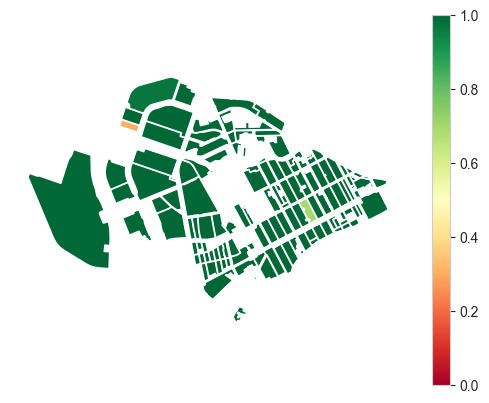

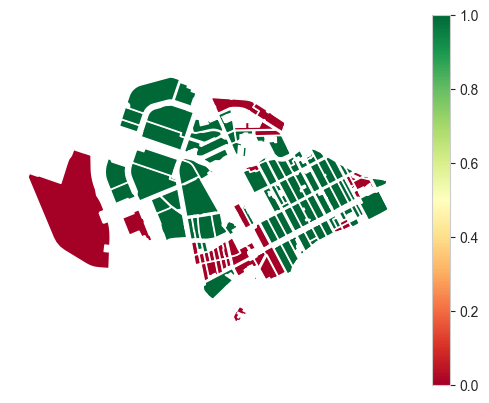

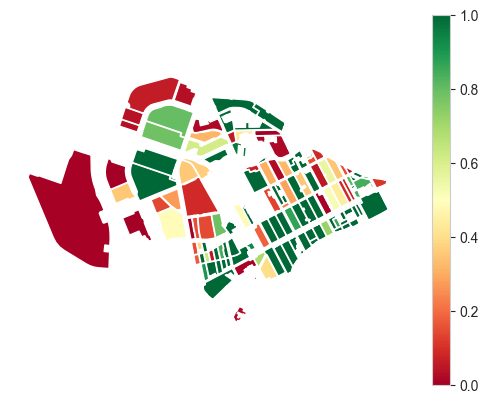

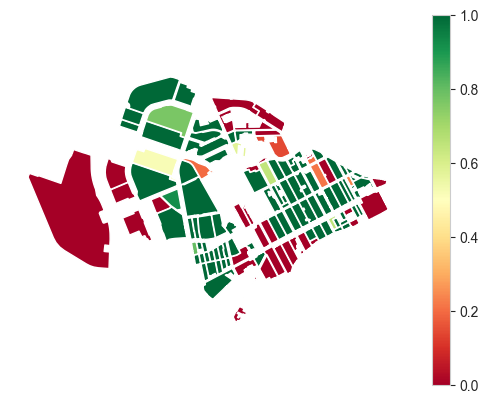

In [20]:
for k,v in gdf.items():
    prov.plot(v)

In [3]:
from blocksnet.method.genetic.template import Genetic
gen = Genetic(city_model=city_model, SCENARIO=scenario)

In [4]:
%%time
res = gen.calculate(all_services, comb_len = 3)

CPU times: total: 2h 40min 59s
Wall time: 2h 41min 29s


In [5]:
res

{0: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 500},
 1: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 1000},
 3: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 500},
 4: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 1000},
 6: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 100,
  'pharmacies': 1500},
 7: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 500},
 9: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 3000},
 10: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 1500},
 12: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 0,
  'pharmacies': 500},
 13: {'hospitals': 0,
  'policlinics': 0,
  'recreational_areas': 100,
  'pharmacies': 1500},
 14: {'hospitals': 0,
  'policlinics': 9615,
  'recreational_areas': 0,
  'pharmacies':

In [21]:
update_df = pd.DataFrame.from_dict(res, orient='index')
gdf, total = prov.calculate_scenario(scenario, update_df)
print(total)

0.21276429868211524


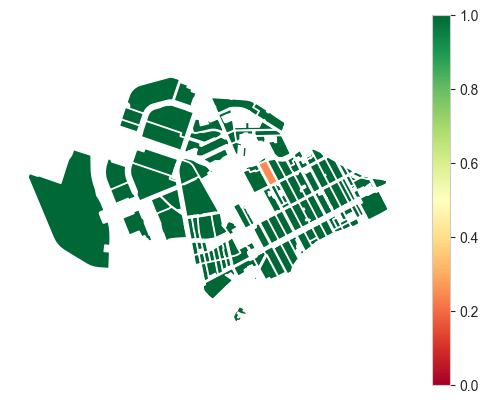

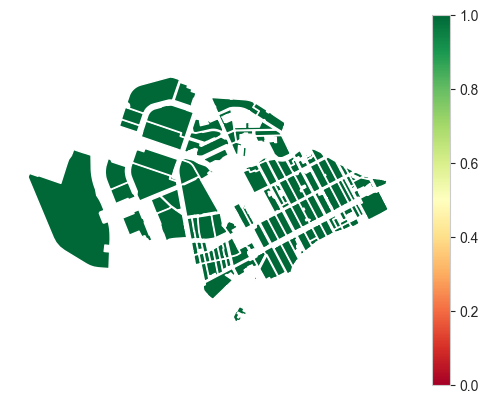

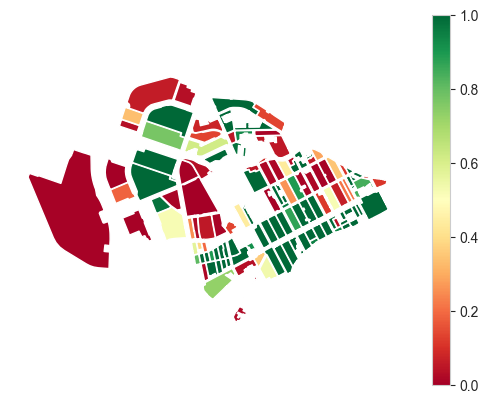

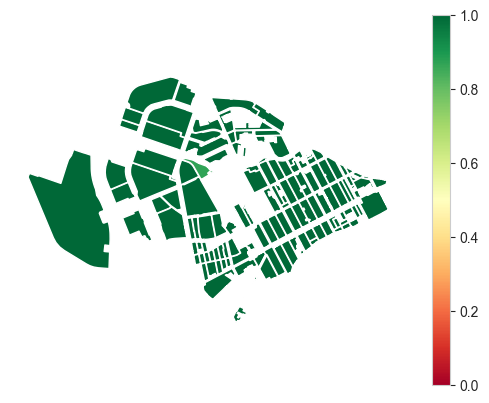

In [22]:
for k,v in gdf.items():
    prov.plot(v)